In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# CSV dataset file name
file_name = 'D2.csv'

In [3]:
# Please put csv file in the same folder with this jupyter notebook
df_prep = pd.read_csv(file_name)

In [4]:
print(df_prep.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   race                      20000 non-null  object
 1   gender                    20000 non-null  object
 2   age                       20000 non-null  object
 3   admission_type_id         20000 non-null  int64 
 4   discharge_disposition_id  20000 non-null  int64 
 5   admission_source_id       20000 non-null  int64 
 6   time_in_hospital          20000 non-null  int64 
 7   medical_specialty         20000 non-null  object
 8   num_lab_procedures        20000 non-null  int64 
 9   num_procedures            20000 non-null  int64 
 10  num_medications           20000 non-null  int64 
 11  number_outpatient         20000 non-null  int64 
 12  number_emergency          20000 non-null  int64 
 13  number_inpatient          20000 non-null  int64 
 14  number_diagnoses      

# Predictive modelling using Decision Tree

# 1. Pre-processing

### a. Check Invalid values

In [5]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
def checkInvalidValue(value):
    print('**********************************')
    print(f'Checking for missing ' + value)
    for col in df_prep.columns:
        if df_prep[col].dtype == object:
            print(col,df_prep[col][df_prep[col] == value].count())

In [6]:
checkInvalidValue('?')
checkInvalidValue('NaN')
checkInvalidValue('Unknown/Invalid')


**********************************
Checking for missing ?
race 0
gender 0
age 0
medical_specialty 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
insulin 0
**********************************
Checking for missing NaN
race 0
gender 0
age 0
medical_specialty 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
insulin 0
**********************************
Checking for missing Unknown/Invalid
race 0
gender 0
age 0
medical_specialty 0
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
insulin 0


### b. Variables

###### Create a new collumn name medchange to record the changing in 10 drugs that have correlation to diabetes patient readmission
###### No, Steady: 0
###### Yes: 1

In [7]:
variables = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'insulin']
for col in variables:
    colname = str(col) + 'temp'
    df_prep[colname] = df_prep[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df_prep['medchange'] = 0
for col in variables:
    colname = str(col) + 'temp'
    df_prep['medchange'] = df_prep['medchange'] + df_prep[colname]
    del df_prep[colname]
    
df_prep['medchange'].value_counts()  

0    13610
1     6085
2      279
3       26
Name: medchange, dtype: int64

Encoding some category variables to numeric values

In [8]:
df_prep['change'] = df_prep['change'].replace(True, 1)
df_prep['change'] = df_prep['change'].replace(False, 0)
df_prep['gender'] = df_prep['gender'].replace('Male', 1)
df_prep['gender'] = df_prep['gender'].replace('Female', 0)
df_prep['diabetesMed'] = df_prep['diabetesMed'].replace(True, 1)
df_prep['diabetesMed'] = df_prep['diabetesMed'].replace(False, 0)

# Medicine change
for col in variables:
    df_prep[col] = df_prep[col].replace('No', 0)
    df_prep[col] = df_prep[col].replace('Steady', 1)
    df_prep[col] = df_prep[col].replace('Up', 1)
    df_prep[col] = df_prep[col].replace('Down', 1)

Mapping values for A1Cresult, max_glu_serum to numeric values

In [9]:
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('>7', 1)
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('>8', 1)
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('Norm', 0)
df_prep['A1Cresult'] = df_prep['A1Cresult'].replace('None', -99)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('>200', 1)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('>300', 1)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('Norm', 0)
df_prep['max_glu_serum'] = df_prep['max_glu_serum'].replace('None', -99)

Age mapping

In [10]:
# mapping
age_map = {'[0-10)':1, '[10-20)':2, '[20-30)':3, '[30-40)':4, '[40-50)':5, '[50-60)':6, '[60-70)':7, '[70-80)':8, '[80-90)':9, '[90-100)':10}
#print(age_map)
df_prep['age'] = df_prep['age'].map(age_map)
print(df_prep['age'].unique())

[ 9  8  6  5  7 10  4  2  3  1]


In [11]:
# mapping
race_map = {'AfricanAmerican':1, 'Asian':2, 'Caucasian':3, 'Hispanic':4, 'Other':5}
#print(age_map)
df_prep['race'] = df_prep['race'].map(race_map)
print(df_prep['race'].unique())

[1 3 5 2 4]


Consider dropping for medical_specialty for missing a lot of information, and it may not affect to our predictive model. 
Dropping race because it doesn't help in predictive model

In [12]:
df_prep = df_prep.drop(['medical_specialty'], axis = 1)

In [13]:
df_prep.head().T

,0,1,2,3,4
race,1,3,3,1,1
gender,0,0,0,0,1
age,9,8,6,6,9
admission_type_id,1,1,3,1,1
discharge_disposition_id,3,3,1,1,3
admission_source_id,7,5,1,7,7
time_in_hospital,1,3,3,6,4
num_lab_procedures,33,48,25,41,22
num_procedures,0,2,1,0,0
num_medications,14,7,15,19,12


In [14]:
df_prep.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
acetohexamide               int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
insulin                     int64
change                      int64
diabetesMed                 int64
readmitted                  int64
medchange     

In [15]:
from sklearn.model_selection import train_test_split

def data_prep(df_prep):
    # one-hot encoding
    df = pd.get_dummies(df_prep)
    
    # target/input split
    y = df['readmitted']
    X = df.drop(['readmitted'], axis=1)

    # setting random state
    rs = 10

    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    
    return df,X,y,X_train, X_test, y_train, y_test

In [16]:
df,X,y,X_train, X_test, y_train, y_test = data_prep(df_prep)
print(df.columns[28])

readmitted


In [17]:
X_mat = X.to_numpy()

# 2. Predictive model

### a. Data partitioning

In [18]:
# setting random state
rs = 10

X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

rs = 10
# simple decision tree training
# model = DecisionTreeClassifier(random_state=rs)
# model.fit(X_train, y_train)

In [20]:
# Based on version to see model description
#model.get_params(deep=True)

In [21]:
# Not good train accuracy, too perfect
#print("Train accuracy:", model.score(X_train, y_train))

In [22]:
#print("Test accuracy:", model.score(X_test, y_test))

In [23]:
#y_pred = model.predict(X_test)
#print(classification_report(y_test, y_pred))

# b. Decision Tree

#### Visualising decision tree structure

### d. Fit decision tree with max depth 5 from GridSearchCV

In [24]:
#retrain with a small max_depth limit
model_2 = DecisionTreeClassifier(max_depth=5, random_state=rs)
model_2.fit(X_train, y_train)
print("Train accuracy:", model_2.score(X_train, y_train))
print("Test accuracy:", model_2.score(X_test, y_test))
y_pred = model_2.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6428571428571429
Test accuracy: 0.6311666666666667
              precision    recall  f1-score   support

           0       0.64      0.71      0.67      3203
           1       0.62      0.54      0.58      2797

    accuracy                           0.63      6000
   macro avg       0.63      0.63      0.62      6000
weighted avg       0.63      0.63      0.63      6000



In [25]:
# grab feature importances from the model and feature name from the original X
importances = model_2.feature_importances_
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
 print(feature_names[i], ':', importances[i])

# In desc order, top 5 important variables: num_lab_procedures, num_medications, time_in_hospital, discharge_disposition_id, age

number_inpatient : 0.5621775744198829
discharge_disposition_id : 0.1847840171335859
number_outpatient : 0.05323493210796076
age : 0.03807486568797821
number_emergency : 0.034204900132138664
diabetesMed : 0.03149679275305533
num_lab_procedures : 0.025769755685942305
num_medications : 0.019412748637202316
admission_type_id : 0.018678246192019594
number_diagnoses : 0.010485036369178758
num_procedures : 0.009723597295882982
admission_source_id : 0.009257337070946257
insulin : 0.0027001965142258444
medchange : 0.0
gender : 0.0
time_in_hospital : 0.0
max_glu_serum : 0.0
A1Cresult : 0.0
metformin : 0.0
repaglinide : 0.0


In [26]:
dtree_2 = DecisionTreeClassifier(max_depth=5, criterion = "entropy", min_samples_split=10)
dtree_2.fit(X_train, y_train)
dtree_2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [27]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
# visualize
dotfile = StringIO()
export_graphviz(dtree_2, out_file=dotfile, feature_names=X.columns, filled=True, class_names = ['0','1'])
graph = pydot.graph_from_dot_data(dotfile.getvalue())

In [28]:
graph[0].write_png('diabetes_viz_2.png') # saved in the following file - will return True if successful

In [29]:
print(dtree_2.tree_.node_count)

63


# d. ROC

In [30]:
# dt_cv_best = cv_1.best_estimator_
# print(dt_cv_best)
# probability prediction from decision tree
y_pred_proba_dt = model_2.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold 0.55")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold 0.55
(Probs on zero)	(probs on one)	(prediction made)
0.39751552795031053 	 0.6024844720496895 	 1
0.6273525721455459 	 0.3726474278544542 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.75 	 0.25 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.39751552795031053 	 0.6024844720496895 	 1
0.3163064833005894 	 0.6836935166994106 	 1
0.8495575221238938 	 0.1504424778761062 	 0
0.5454042081949059 	 0.45459579180509413 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.5454042081949059 	 0.45459579180509413 	 0
0.709556057185854 	 0.290443942814146 	 0
0.5454042081949059 	 0.45459579180509413 	 0
0.709556057185854 	 0.290443942814146 	 0
0.6273525721455459 	 0.3726474278544542 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6273525721455459 	 0.3726474278544542 	 0
0.5454042081949059 	 0.45459579180509413 	 0
0.39751552795031053

The ROC AUC score aims to find the best model under the varied threshold values. To compute the ROC AUC score, use the code below.

In [31]:
from sklearn.metrics import roc_auc_score

#y_pred_proba_dt = model_default.predict_proba(X_test)

y_pred_proba_dt = model_2.predict_proba(X_test)

#roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])

#print("ROC index on test for DT_default:", roc_index_dt)

print("ROC index on test for DT_optimal:", roc_index_dt)

ROC index on test for DT_optimal: 0.6676265246058314


In [32]:
from sklearn.metrics import roc_curve

#fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
#fpr_dt_small, tpr_dt_small, thresholds_dt_small = roc_curve(y_test, y_pred_proba_dt_small[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])

In [33]:
# #plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT_default {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
# plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_optimal {:.3f}'.format(roc_index_dt_cv), color='blue', lw=0.5)

# # plt.plot(fpr[2], tpr[2], color='darkorange',
# #          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
# plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.0])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()

The DT with GridSearchCV (`DT_CV`) shows the largest curve area compared to the DT with default settings (`DT`). Thus `DT_CV` is the best performing model.

# Logistic Regression

In [34]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 1, max 5, mean 2.73 and std dev 0.81
Variable #1: min 0, max 1, mean 0.46 and std dev 0.50
Variable #2: min 1, max 10, mean 7.18 and std dev 1.57
Variable #3: min 1, max 8, mean 1.81 and std dev 1.21
Variable #4: min 1, max 28, mean 3.18 and std dev 4.35
After scaling
-------------
Variable #0: min -2.131860544576406, max 2.7972967839239544, mean 0.00 and std dev 1.00
Variable #1: min -0.92348913710008, max 1.0828497703178466, mean -0.00 and std dev 1.00
Variable #2: min -3.939541810142892, max 1.7974560757140987, mean 0.00 and std dev 1.00
Variable #3: min -0.6710221875474691, max 5.125890222506477, mean 0.00 and std dev 1.00
Variable #4: min -0.5018574673834632, max 5.708314486358282, mean 0.00 and std dev 1.00


In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
model_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(random_state=10), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             return_train_score=True)

In [36]:
model_cv.fit(X_train, y_train)

print("Train accuracy:", model_cv.score(X_train, y_train))
print("Test accuracy:", model_cv.score(X_test, y_test))

Train accuracy: 0.6313571428571428
Test accuracy: 0.6236666666666667


In [37]:
from sklearn.metrics import roc_auc_score
y_pred_proba_dt_cv = model_cv.predict_proba(X_test)

roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])

print("ROC index on test for DT_cv:", roc_index_dt_cv)

ROC index on test for DT_cv: 0.6619040448649823


In [38]:
from sklearn.metrics import roc_curve

fpr_dt_cv, tpr_dt_cv, thresholds_dt_cv = roc_curve(y_test, y_pred_proba_dt_cv[:,1])

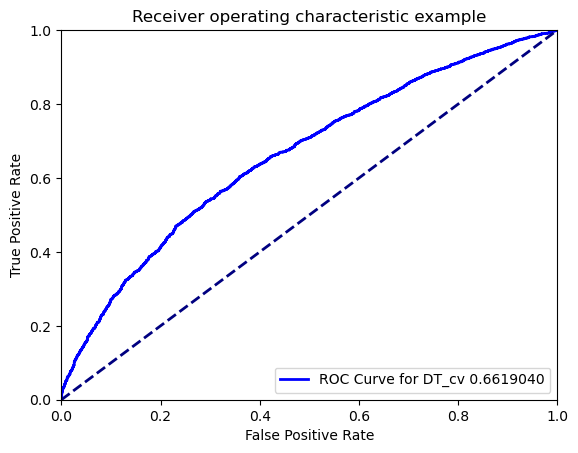

In [39]:
plt.plot(fpr_dt_cv, tpr_dt_cv, label='ROC Curve for DT_cv {:.7f}'.format(roc_index_dt_cv), color='blue', lw=2)


# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Nerual Network

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train)

print(rfe.n_features_)

24


In [41]:
from sklearn.neural_network import MLPClassifier
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

#step = int((X_train_rfe.shape[1] + 5)/5)
#print(step)
params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

rfe_cv = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

print(rfe_cv.best_params_)

Train accuracy: 0.6439285714285714
Test accuracy: 0.632
              precision    recall  f1-score   support

           0       0.63      0.74      0.68      3203
           1       0.63      0.51      0.57      2797

    accuracy                           0.63      6000
   macro avg       0.63      0.62      0.62      6000
weighted avg       0.63      0.63      0.63      6000

{'alpha': 1e-05, 'hidden_layer_sizes': (7,)}


# ROC for Decision Tree, Logistic Regression, Neural Network

In [42]:
y_pred_proba_dt = model_2.predict_proba(X_test)

print("Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold 0.55")
print("(Probs on zero)\t(probs on one)\t(prediction made)")
# print top 10
for i in range(20):
    print(y_pred_proba_dt[i][0], '\t', y_pred_proba_dt[i][1], '\t', y_pred[i])

Probability produced by decision tree for each class vs actual prediction on TargetB (0 = non-donor, 1 = donor). You should be able to see the default threshold 0.55
(Probs on zero)	(probs on one)	(prediction made)
0.5327510917030568 	 0.4672489082969432 	 1
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.8495575221238938 	 0.1504424778761062 	 0
0.49793388429752067 	 0.5020661157024794 	 1
0.8495575221238938 	 0.1504424778761062 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.8495575221238938 	 0.1504424778761062 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.8495575221238938 	 0.1504424778761062 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892673 	 0
0.6676986584107327 	 0.3323013415892

In [48]:
from sklearn.metrics import roc_auc_score

#y_pred_proba_dt = model_2.predict_proba(X_test)
y_pred_proba_lr = model_cv.predict_proba(X_test)
y_pred_proba_nn = rfe_cv.predict_proba(X_test_rfe)

roc_index_dt_cv = roc_auc_score(y_test, y_pred_proba_dt_cv[:, 1])
roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])




print("ROC index on test for Decision Tree:", roc_index_dt_cv)
print("ROC index on test for Logistic Regression:", roc_index_lr)
print("ROC index on test for Neural Network:", roc_index_nn)



from sklearn.metrics import roc_curve

#fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:,1])

ROC index on test for Decision Tree: 0.6619040448649823
ROC index on test for Logistic Regression: 0.6619040448649823
ROC index on test for Neural Network: 0.6686336359448501


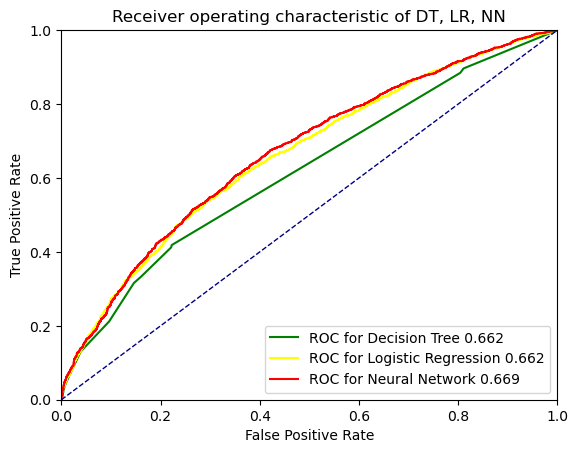

In [49]:
import matplotlib.pyplot as plt

print()
plt.plot(fpr_dt, tpr_dt, label='ROC for Decision Tree {:.3f}'.format(roc_index_dt_cv), color='green', lw=1.5)
plt.plot(fpr_lr, tpr_lr, label='ROC for Logistic Regression {:.3f}'.format(roc_index_dt_cv), color='yellow', lw=1.5)
plt.plot(fpr_nn, tpr_nn, label='ROC for Neural Network {:.3f}'.format(roc_index_nn), color='red', lw=1.5)

plt.plot([0, 1], [0, 1], color='navy', lw=1.0, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of DT, LR, NN')
plt.legend(loc="lower right")
plt.show()